In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

x = df.loc[:, features].values
y = df.loc[:,["Outcome"]].values
x = StandardScaler().fit_transform(x)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principal.head()

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [5]:
final = pd.concat([principal, df[['Outcome']]], axis = 1)
final.head()

,PC1,PC2,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1


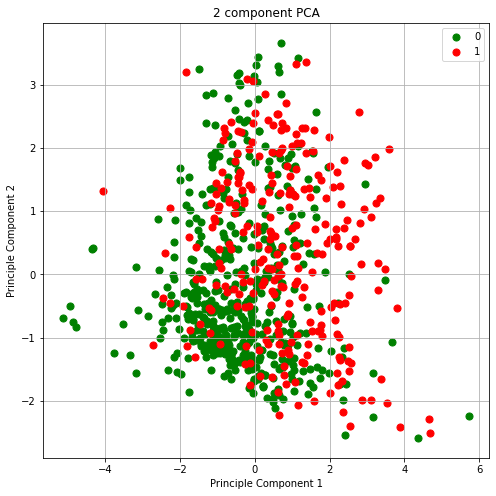

In [6]:
figDraw = plt.figure(figsize = (8,8))
dia = figDraw.add_subplot(1,1,1) 
dia.set_xlabel('Principle Component 1')
dia.set_ylabel('Principle Component 2')
dia.set_title('2 component PCA')
targets = [0,1]
colors = ['green', 'red']
for target, color in zip(targets,colors):
    indices = final['Outcome'] == target
    dia.scatter(final.loc[indices, 'PC1'], final.loc[indices, 'PC2'], c = color, s = 50)
dia.legend(targets)
dia.grid()

# cdict = {1: 'red', 0: 'green'}
# plt.scatter(P[:,0], P[:,1], c = data["Outcome"].map(cdict))

### Selection of appropriate principle components
Given 8 features - "Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" - for dimensionality reduction resulting in 2 principle components.

Set 1: DiabetesPedigreeFunction, Glucose, BMI, Insulin<br>
Set 2: Age, Pregnancy, SkinThickness, BloodPressure

The sets are selected according to relations and potential dependency between the elements of the set. Diabetes pedigree function have significant influence on the model, specially glucose level and BMI. Similarly, age and pregnancy are related, so is skin thickness and pregnancy. Hence, sets of features are selected logically to create principle components.

In the code section, PCA model from Sklearn.decomposition automatically creates the priciple components without selecting and grouping features manually.